# Summary:
To compare the movement path variance, `var_p`, across days, I calculate the cumulative movement path variance, `cumuative_var_p`, as the sum of the variance across 100% of the movement: $\int\limits_{0}^{100} Var_p(p) dp$ where $p =$ % movement completed. Then, I plot the cumulative movement path variance for each day.

### imports

In [2]:
from scipy import io
import numpy as np
import matplotlib.pyplot as plt
import statistics
import pandas as pd
import scipy.signal as signal
import pickle
import glob # find files in a directory
import re # regex for string parsing

### set `folder_name`

In [3]:
folder_name = './Data/AnB1/'
lever_data_folder = "./Data/AnB1/LeverData_ANB1_d1/"
lever_data_matfile = "./Data/AnB1/LeverData_ANB1_d1.mat"
output_folder = "./Data/AnB1/analysis3_ANB1/"
!mkdir {output_folder}

mkdir: ./Data/AnB1/analysis3_ANB1/: File exists


### sort through relevant sorted_analysis2_folders by day ("_d#")

In [4]:
unsorted_analysis2_folders = glob.glob(folder_name+'analysis2_ANB1*/')
sorted_analysis2_folders = sorted(unsorted_analysis2_folders, key=lambda x: int(re.search(r'\d/$',x).group()[:-1]))
sorted_analysis2_folders

['./Data/AnB1/analysis2_ANB1_d1/']

### get `movements_var_ps` and calculate `cumulative_var_p`, $\int\limits_{0}^{100} Var_p(p) dp$ where $p =$ % movement completed. Save to `cumulative_var_ps`, a list of all `cumulative_var_p`'s from all days.

Sticking with num_samples of 10*10000 as explained in analysis2

In [5]:
num_samples = 10*10000

cumulative_var_ps = []
for analysis2_folder in sorted_analysis2_folders:
    var_p = np.load(analysis2_folder+"var_p.npy")

    # Compute the area using the composite trapezoidal rule.
    cumulative_var_p = np.trapz(var_p, dx=(100/num_samples))
    print("cumulative_var_p: ", cumulative_var_p)
    cumulative_var_ps.append(cumulative_var_p)

cumulative_var_ps = np.array(cumulative_var_ps)

cumulative_var_p:  0.8795820500781925


### plot `cumulative_var_p` over days

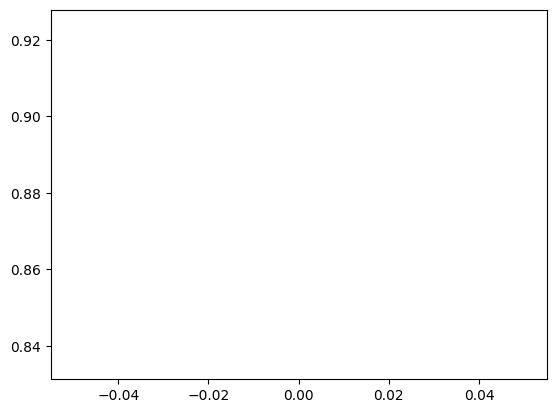

In [6]:
plt.plot(range(0,len(cumulative_var_ps)),cumulative_var_ps)

### save `cumulative_var_ps`

In [7]:
np.save(output_folder+"cumulative_var_ps", cumulative_var_ps)